# Loan effects on Borrower's Annual Percentage Rate

## by Bassam A. Mutairi

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()

In [4]:
# remove loans without Prosper Score for better analysis
df_copy = df_copy[df_copy['ProsperScore'].isnull() == False]

In [17]:
# remove score that has more than 10 rating
df_copy = df_copy[df_copy['ProsperScore'] < 11]

In [18]:
# remove outliers
df_copy = df_copy[df_copy.StatedMonthlyIncome <= 30000]

In [20]:
# Convert Prosper Rating (Alpha) and Employment Status into ordered categorical types

# Prosper Rate
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = rate_order)

df_copy['ProsperRating (Alpha)'] = df_copy['ProsperRating (Alpha)'].astype(ordered_var)


# Emp status
emp_order = ['Employed',
             'Self-employed',
             'Full-time',
             'Part-time',
             'Retired',
             'Other',
             'Not employed']

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = emp_order)

df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].astype(ordered_var)

## Distribution of Borrower APR

The distribution of APR looks multimodal. A small peak centered at 0.1 and 0.3. A large peak centered at 0.2. However,, there is a significant peak between 0.35 and 0.36.

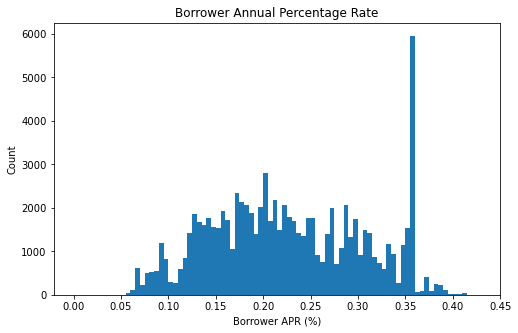

In [5]:
plt.figure(figsize=[8, 5])

bins = np.arange(0, df_copy.BorrowerAPR.max(), 0.005)
plt.hist(data = df_copy, x = 'BorrowerAPR', bins = bins);
plt.title('Borrower Annual Percentage Rate')
plt.xlabel('Borrower APR (%)')
plt.ylabel('Count')
plt.xticks(np.arange(0, df_copy['BorrowerAPR'].max()+0.05, 0.05));

### Top 10 Occupations

Most the borrowers has registered as Other or Professional and this assure that most of the people don't like to share their personal details on the Internet.

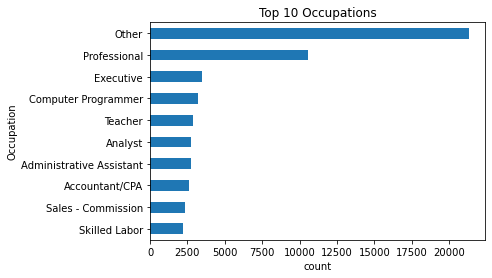

In [6]:
df_copy['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations')
plt.xlabel('count')
plt.ylabel('Occupation');

### Stated Monthly Income

The distribution of stated monthly income is right right skewed and most of stated monthly income less than 30,000.

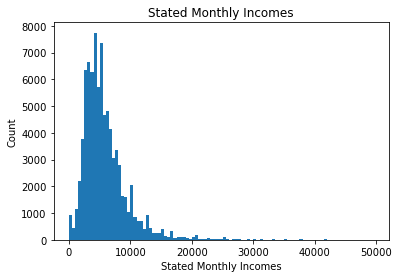

In [7]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = df_copy, x = 'StatedMonthlyIncome', bins=bins);
plt.title('Stated Monthly Incomes')
plt.xlabel('Stated Monthly Incomes')
plt.ylabel('Count');

### Borrower APR vs. Loan Amount

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

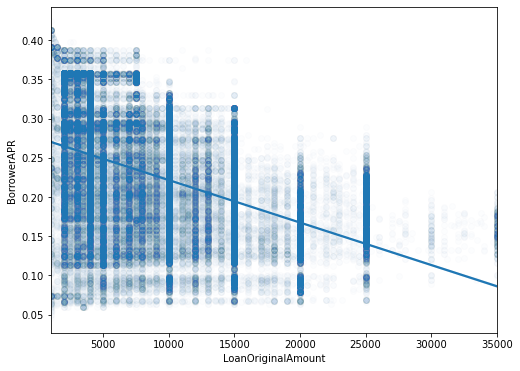

In [15]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_copy,
           x = 'LoanOriginalAmount',
           y = 'BorrowerAPR',
           scatter_kws={'alpha':0.01});

### How Prosper Rating and Term affect on Stated Monthly Income and Loan Original Amount

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

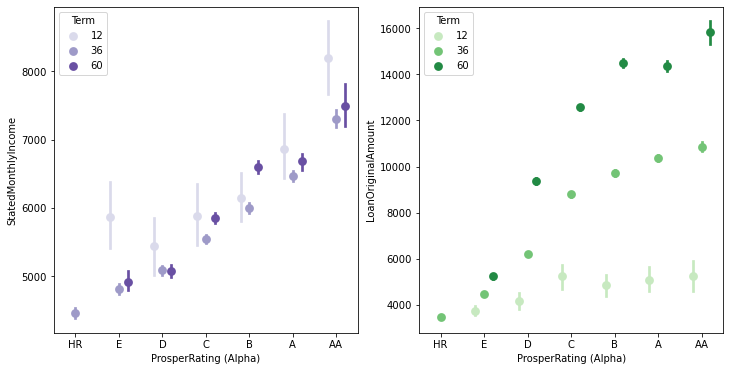

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])

sb.pointplot(data = df_copy,
             x = 'ProsperRating (Alpha)',
             y = 'StatedMonthlyIncome',
             hue = 'Term',
             palette = 'Purples',
             linestyles = '',
             dodge = 0.4,
             ax=ax[0])

sb.pointplot(data = df_copy,
             x = 'ProsperRating (Alpha)',
             y = 'LoanOriginalAmount',
             hue = 'Term',
             palette = 'Greens',
             linestyles = '',
             dodge = 0.4,
             ax=ax[1]);